In [165]:
import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt

In [166]:
# Заданные параметры для 9 варианта
a = - 4
sigma2 = 6
std_sigma = np.sqrt(sigma2)
gamma = 0.90
n = 17

# 1 Моделирование выборки из n независимых наблюдений

In [167]:
sample = np.random.normal(loc = a, scale = std_sigma, size = n)
print(sample)

[-4.0123573  -3.28840655 -8.68348928  0.21312661 -8.13971992 -2.22091689
 -7.5910666  -4.67031042 -1.61883015 -2.1205258  -5.93715098 -5.89042507
 -3.39475769 -4.89509121 -0.04746214 -2.77528405 -7.20837331]


# 1.1 Интервальная оценка математического ожидания при известной дисперсии

In [168]:

t_gamma = stats.norm.ppf((1 + gamma) / 2)
mean_sample = np.mean(sample)

error_known = t_gamma * (std_sigma / np.sqrt(n))
interval_mean_known = (
    mean_sample - error_known,
    mean_sample + error_known
)

print("1.1 Доверительный интервал для математического ожидания (известная дисперсия): \n",
      interval_mean_known)

interval_mean_known_py = stats.norm.interval(gamma, loc=mean_sample, scale=std_sigma/np.sqrt(n))
print("\n1.1 Проверка доверительного интервала (известная дисперсия) с встроенной функцией: \n",
      interval_mean_known_py)


1.1 Доверительный интервал для математического ожидания (известная дисперсия): 
 (np.float64(-5.2290145935704535), np.float64(-3.2746372608317276))

1.1 Проверка доверительного интервала (известная дисперсия) с встроенной функцией: 
 (np.float64(-5.2290145935704535), np.float64(-3.2746372608317276))


# 1.2 Интервальная оценка математического ожидания при неизвестной дисперсии

In [169]:

t_critical = stats.t.ppf((1 + gamma) / 2, df = n - 1)
std_sample = np.std(sample, ddof = 1)

error_unknow = t_critical * (std_sample / np.sqrt(n))
interval_mean_unknown = (
    mean_sample - error_unknow,
    mean_sample + error_unknow
)

print("1.2 Доверительный интервал для математического ожидания (неизвестная дисперсия):\n",
      interval_mean_unknown)

interval_mean_unknown_py = stats.t.interval(gamma, df=n-1, loc=mean_sample, scale=std_sample/np.sqrt(n))
print("\n1.2 Проверка доверительного интервала (неизвестная дисперсия) с встроенной функцией:\n",
      interval_mean_unknown_py)

1.2 Доверительный интервал для математического ожидания (неизвестная дисперсия):
 (np.float64(-5.401141775992345), np.float64(-3.102510078409835))

1.2 Проверка доверительного интервала (неизвестная дисперсия) с встроенной функцией:
 (np.float64(-5.401141775992346), np.float64(-3.102510078409835))


# 1.3 Интервальная оценка дисперсии

In [170]:

chi2_lower = stats.chi2.ppf((1 - gamma) / 2, df = n - 1)
chi2_upper = stats.chi2.ppf((1 + gamma) / 2, df = n - 1)

var_lower = (n - 1) * (std_sample**2) / chi2_upper
var_upper = (n - 1) * (std_sample**2) / chi2_lower
interval_var = (var_lower, var_upper)

print("1.3 Доверительный интервал для дисперсии: \n", interval_var)

chi2_interval = stats.chi2.interval(gamma, df=n-1)
var_lower_py = (n - 1) * (std_sample ** 2) / chi2_interval[1]
var_upper_py = (n - 1) * (std_sample ** 2) / chi2_interval[0]
interval_var_py = (var_lower_py, var_upper_py)
print("\n1.3 Проверка доверительного интервала для дисперсии с встроенной функцией:\n", interval_var_py)

1.3 Доверительный интервал для дисперсии: 
 (np.float64(4.482534452821834), np.float64(14.805198893428456))

1.3 Проверка доверительного интервала для дисперсии с встроенной функцией:
 (np.float64(4.482534452821834), np.float64(14.805198893428456))


# 2. График зависимости длины доверительного интервала от надежности при неизменном объеме выборки

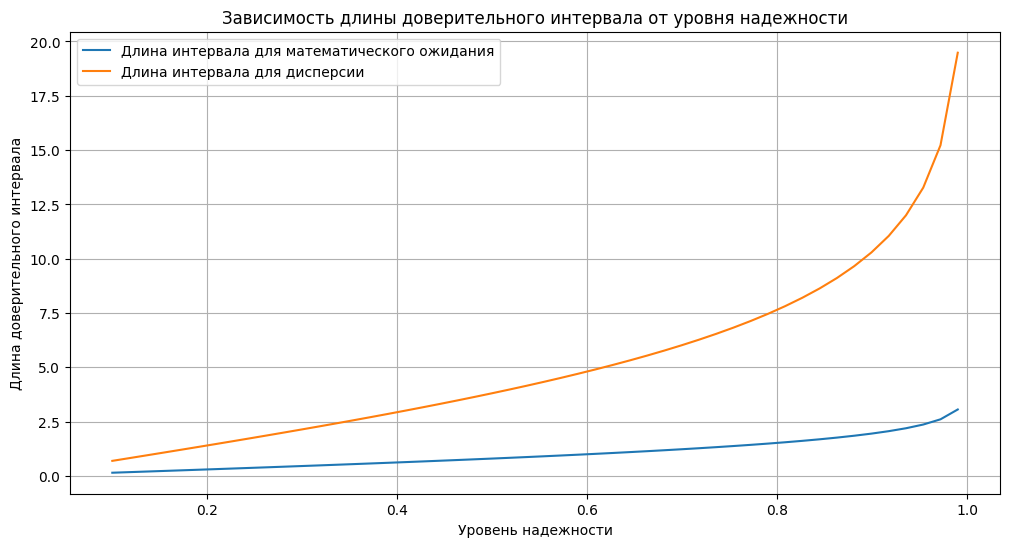

In [171]:
confidence_levels = np.linspace(0.10, 0.99, 50)
interval_lengths_mean = []
interval_lengths_variance = []

for gamma_ in confidence_levels:
    # Для математического ожидания 
    t_gamma_ = stats.norm.ppf((1 + gamma_) / 2)
    error_known_ = t_gamma_ * (std_sigma / np.sqrt(n))
    interval_length_mean = 2 * error_known_
    interval_lengths_mean.append(interval_length_mean)

    # Для дисперсии
    chi2_lower_ = stats.chi2.ppf((1 - gamma_) / 2, df=n-1)
    chi2_upper_ = stats.chi2.ppf((1 + gamma_) / 2, df=n-1)
    interval_length_variance = (n - 1) * (std_sample ** 2) * (1/chi2_lower_ - 1/chi2_upper_)
    interval_lengths_variance.append(interval_length_variance)

# Построение графиков
plt.figure(figsize=(12, 6))
plt.plot(confidence_levels, interval_lengths_mean, label='Длина интервала для математического ожидания')
plt.plot(confidence_levels, interval_lengths_variance, label='Длина интервала для дисперсии')
plt.xlabel('Уровень надежности')
plt.ylabel('Длина доверительного интервала')
plt.title('Зависимость длины доверительного интервала от уровня надежности')
plt.legend()
plt.grid()
plt.show()

# 3. График зависимости длины доверительного интервала от объема выборки при неизменной надежности

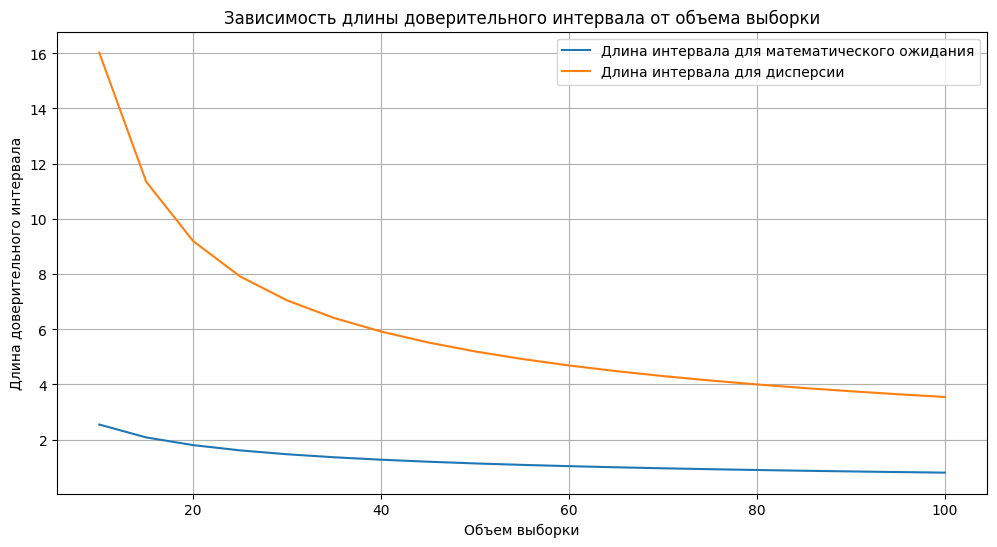

In [172]:
sample_sizes_3 = np.arange(10, 101, 5)
interval_lengths_mean_3 = []
interval_lengths_variance_3 = []

for n_ in sample_sizes_3:
    # Для математического ожидания 
    error_known_ = t_gamma * (std_sigma / np.sqrt(n_))
    interval_length_mean_n = 2 * error_known_
    interval_lengths_mean_3.append(interval_length_mean_n)

    # Для дисперсии
    chi2_lower_ = stats.chi2.ppf((1 - gamma) / 2, df=n_-1)
    chi2_upper_ = stats.chi2.ppf((1 + gamma) / 2, df=n_-1)
    interval_length_variance_n = (n_ - 1) * (std_sample ** 2) * (1/chi2_lower_ - 1/chi2_upper_)
    interval_lengths_variance_3.append(interval_length_variance_n)

# Построение графиков
plt.figure(figsize=(12, 6))
plt.plot(sample_sizes_3, interval_lengths_mean_3, label='Длина интервала для математического ожидания')
plt.plot(sample_sizes_3, interval_lengths_variance_3, label='Длина интервала для дисперсии')
plt.xlabel('Объем выборки')
plt.ylabel('Длина доверительного интервала')
plt.title('Зависимость длины доверительного интервала от объема выборки')
plt.legend()
plt.grid()
plt.show()

# 4. Построение гистограммы выборки и наложение на неё плотности нормального распределения

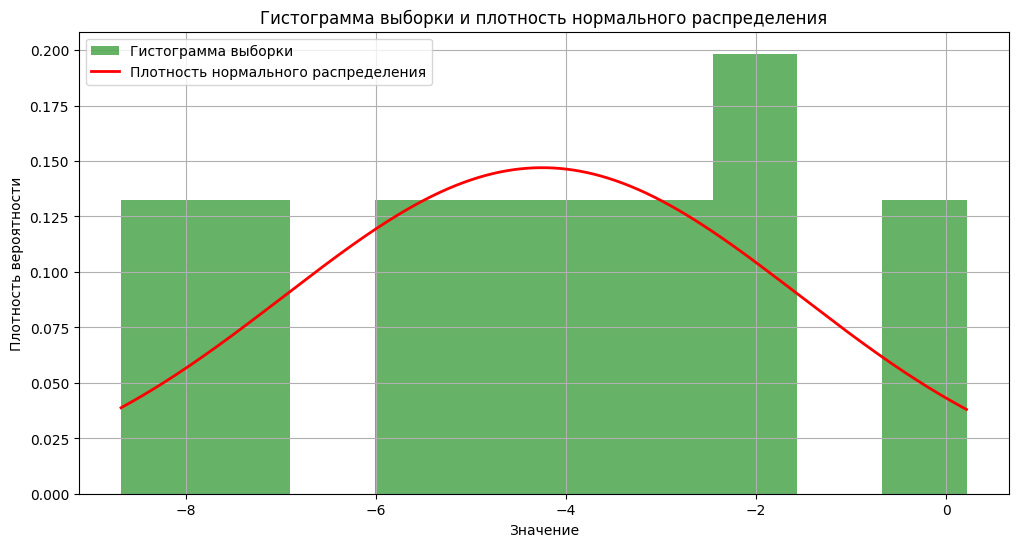

In [173]:
plt.figure(figsize = (12,6))
plt.hist(sample, bins = 10, density = True, alpha = 0.6, color = 'g', label = 'Гистограмма выборки')

x = np.linspace(min(sample), max(sample), 1000)
pdf = stats.norm.pdf(x, loc = mean_sample, scale = std_sample)

plt.plot(x, pdf, 'r-', lw = 2, label = 'Плотность нормального распределения')
plt.xlabel('Значение')
plt.ylabel('Плотность вероятности')
plt.title('Гистограмма выборки и плотность нормального распределения')
plt.legend()
plt.grid()
plt.show()

### Q-Q график для оценки нормальности распределения

<Figure size 1200x600 with 0 Axes>

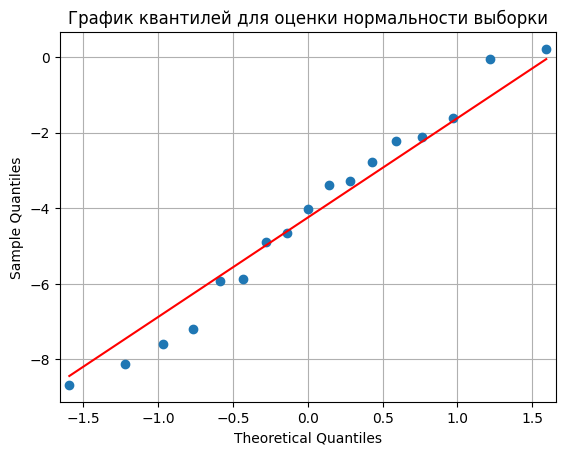

In [174]:
import statsmodels.api as sm

plt.figure(figsize=(12, 6))
sm.qqplot(sample, line='s')
plt.title('График квантилей для оценки нормальности выборки')
plt.grid()
plt.show()